In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


# Data Cleansing


In [51]:
data.rename(columns = {'Formatted Date':'formatted_date', 'Summary':'summary', 'Precip Type':'precip_type', 'Temperature (C)':'temperature', 'Apparent Temperature (C)':'apparent_temperature', 'Humidity':'humidity', 'Wind Speed (km/h)':'wind_speed', 'Wind Bearing (degrees)':'wind_bearing', 'Visibility (km)':'visibility', 'Pressure (millibars)':'pressure', 'Daily Summary':'daily_summary'}, inplace=True)

data.head()

,formatted_date,summary,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,pressure,daily_summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


***We only need formatted_date, apparent_temperature and humidity for the hypothesis given. So, we can drop all other columns.***

In [53]:
data = data[['formatted_date', 'apparent_temperature', 'humidity']]

data.head()

,formatted_date,apparent_temperature,humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [28]:
data['formatted_date'] = pd.to_datetime(data['formatted_date'], utc=True)
data.head()

,formatted_date,apparent_temperature,humidity
0,2006-03-31 22:00:00+00:00,7.388889,0.89
1,2006-03-31 23:00:00+00:00,7.227778,0.86
2,2006-04-01 00:00:00+00:00,9.377778,0.89
3,2006-04-01 01:00:00+00:00,5.944444,0.83
4,2006-04-01 02:00:00+00:00,6.977778,0.83


In [30]:
df= data.set_index('formatted_date')
df = df.resample('M').mean()
df.head()

,apparent_temperature,humidity
formatted_date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


# EDA:

In [32]:
at = df['apparent_temperature'].values
hum = df['humidity'].values

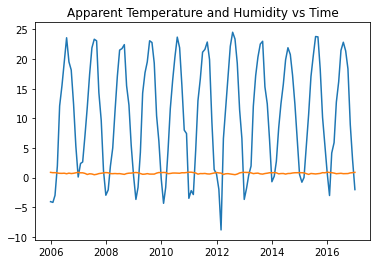

In [58]:
plt.plot(df)
plt.title('Apparent Temperature and Humidity vs Time')
plt.show()

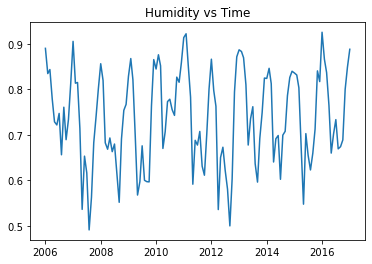

In [59]:
plt.plot(df['humidity'])
plt.title('Humidity vs Time')
plt.show()

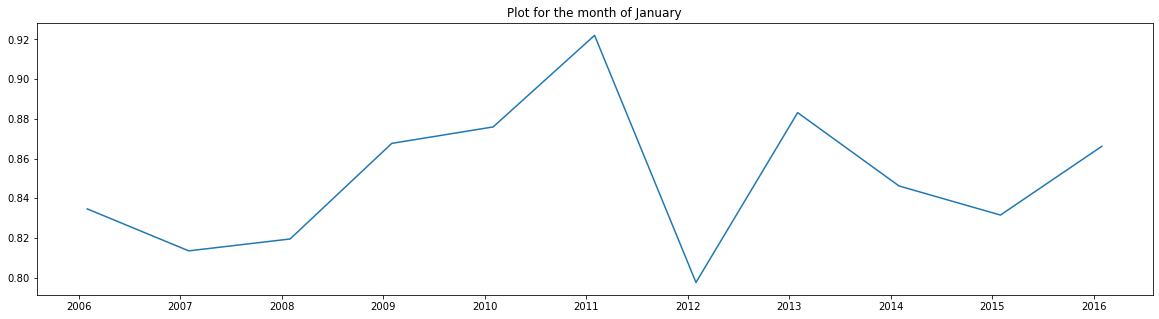

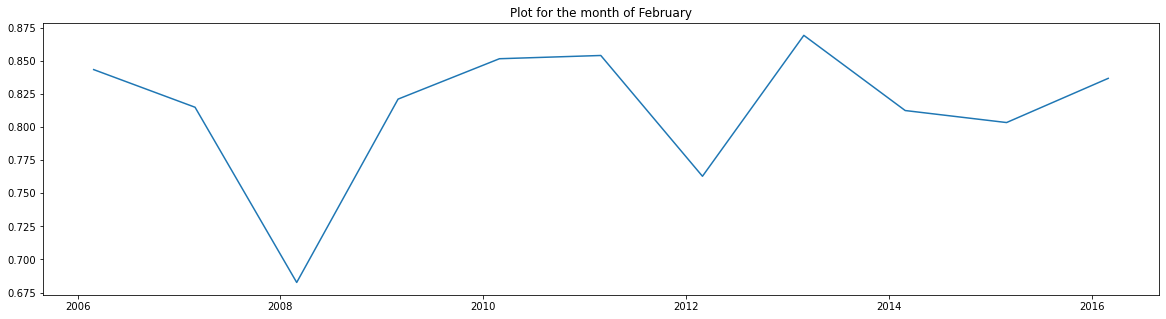

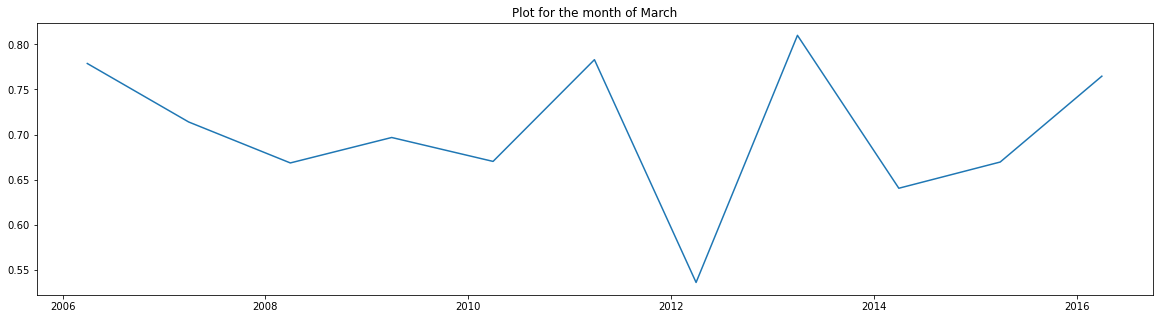

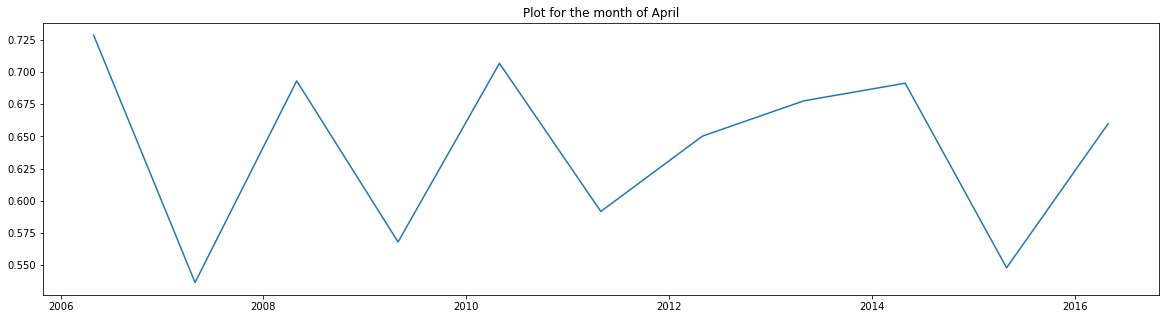

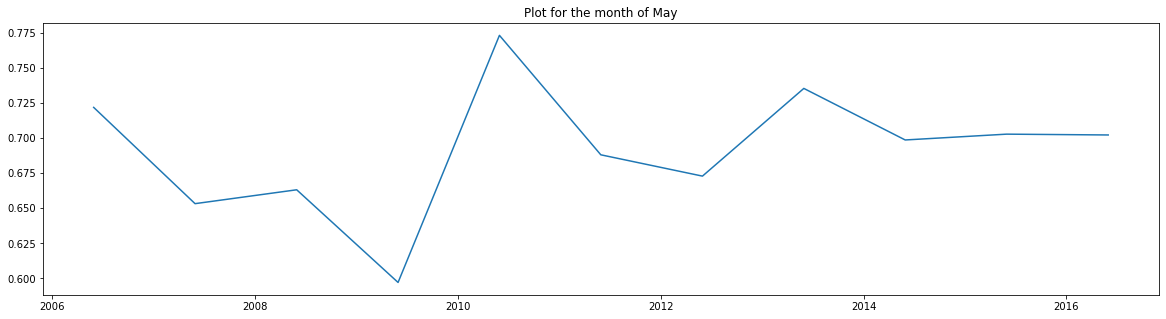

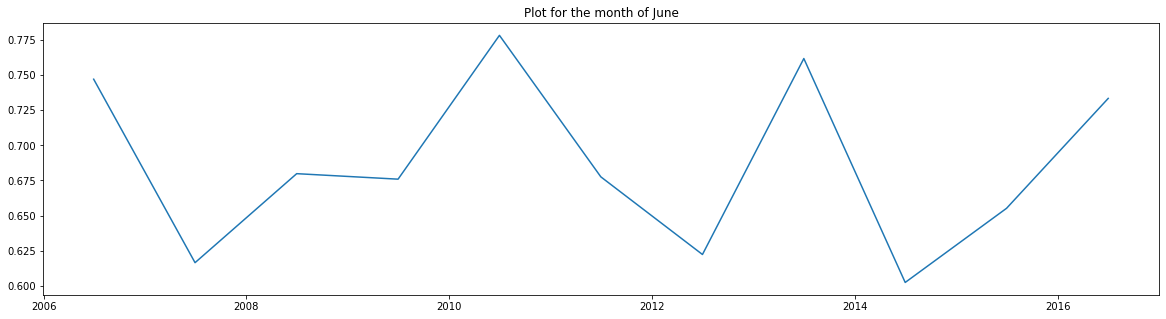

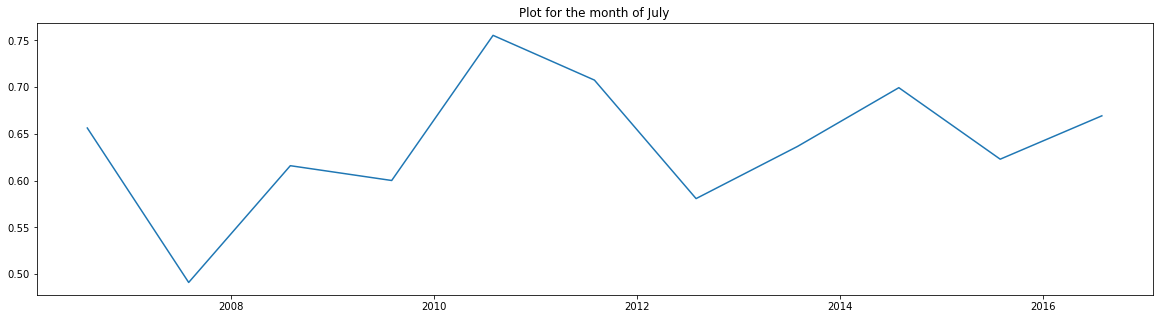

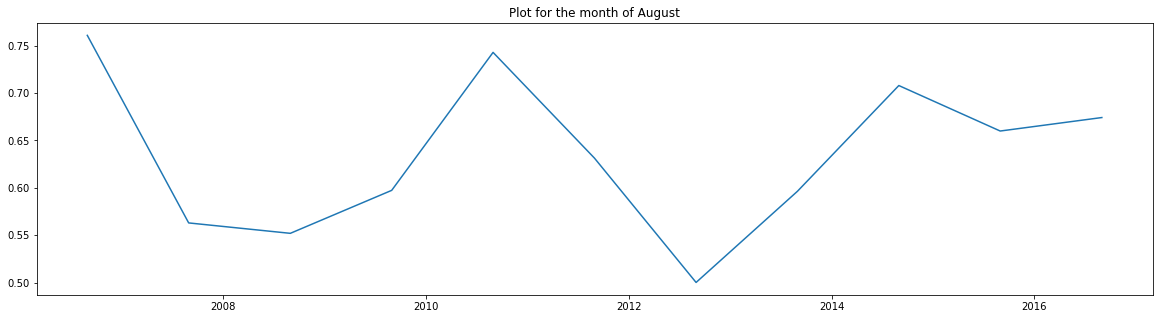

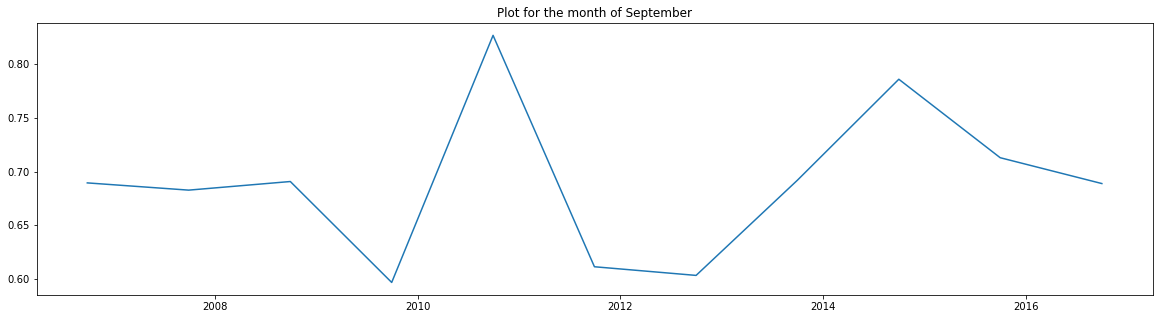

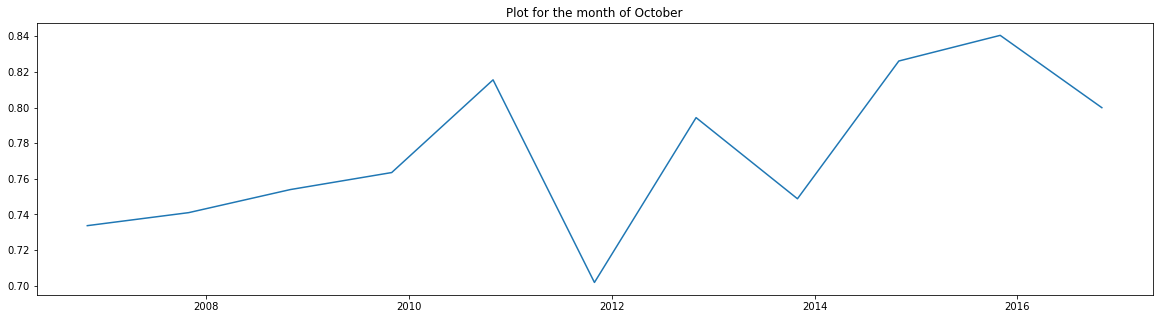

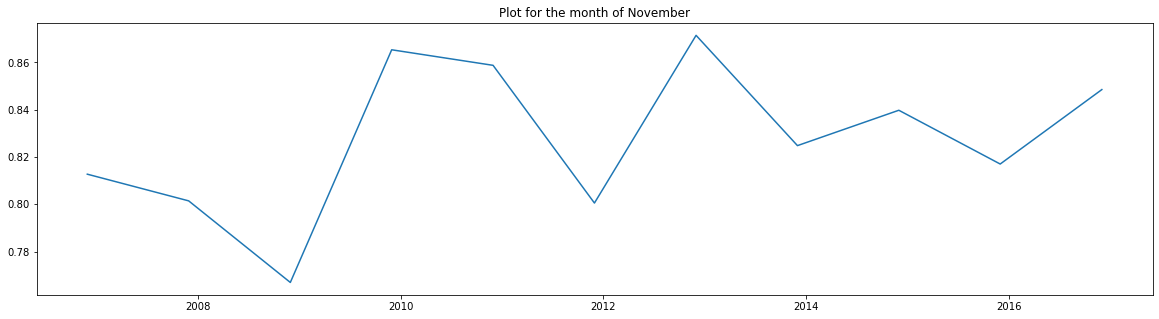

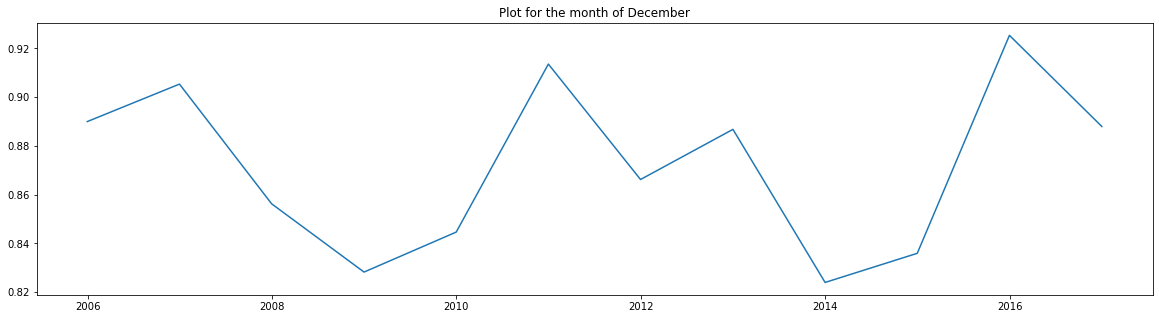

In [56]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', "August", "September", 'October', 'November', 'December']

for m in range(1,13):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 1, 1)
    df1 = df[df.index.month==m]
    t = 'Plot for the month of '+ months[m-1]
    plt.title(t)
    plt.plot(df1)
    plt.show()

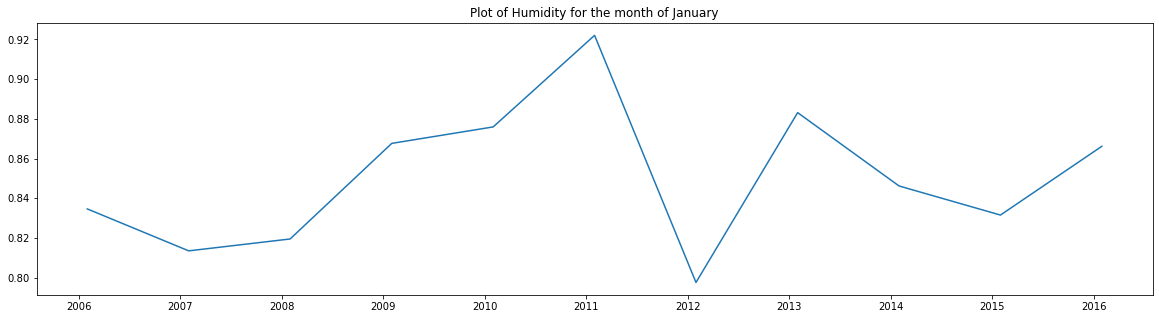

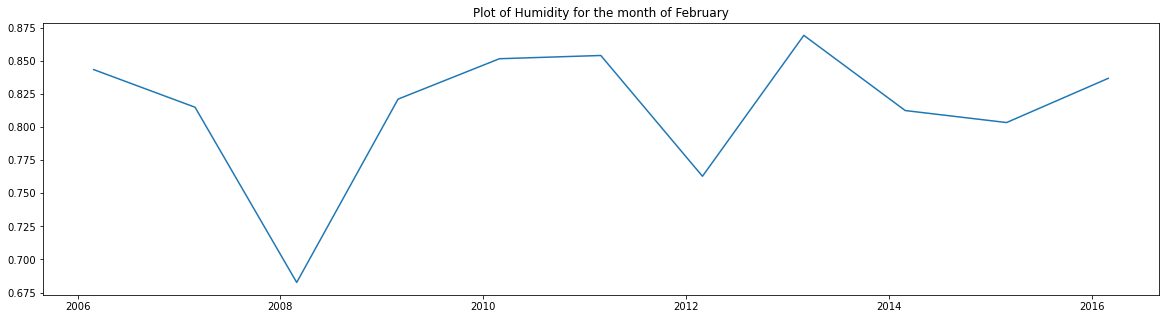

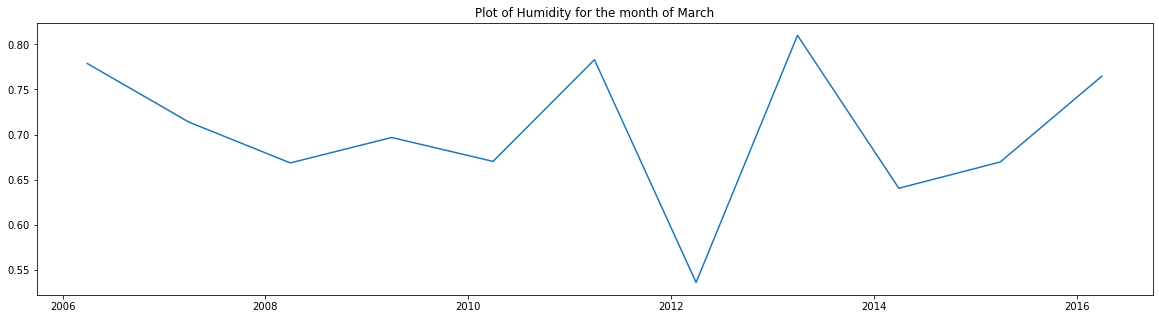

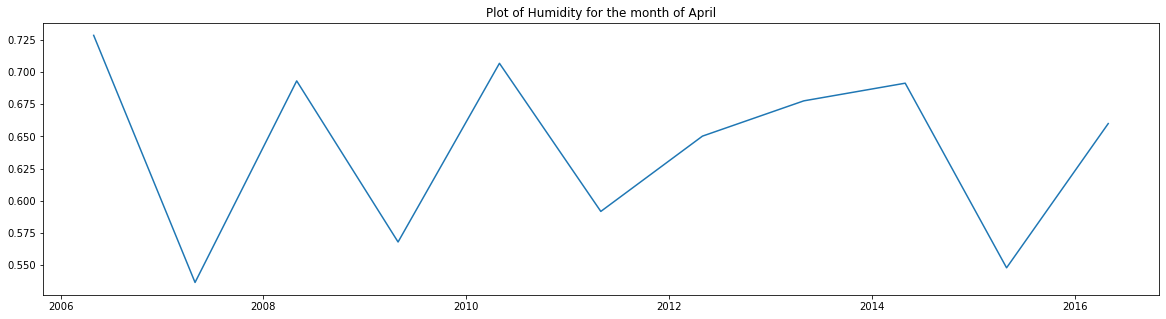

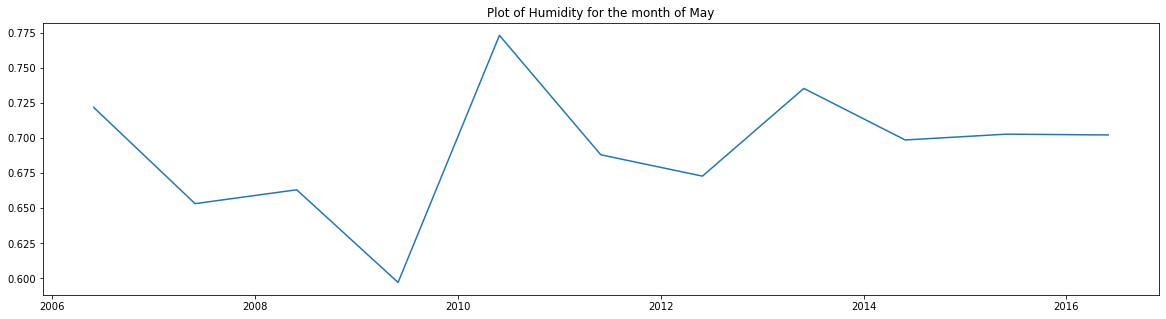

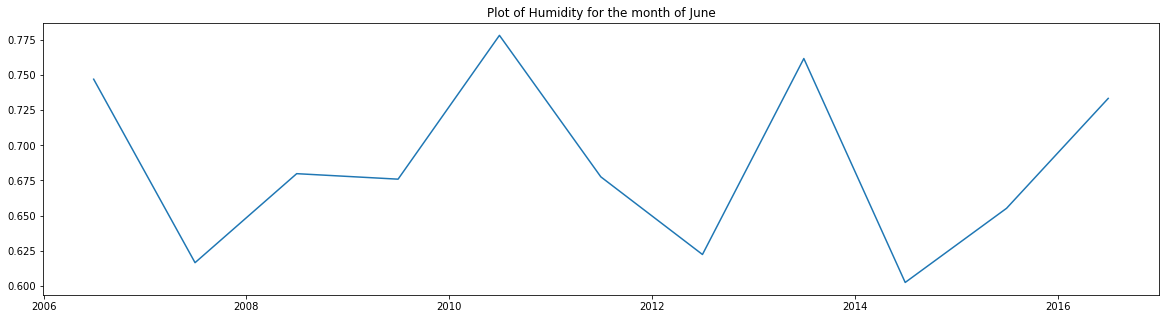

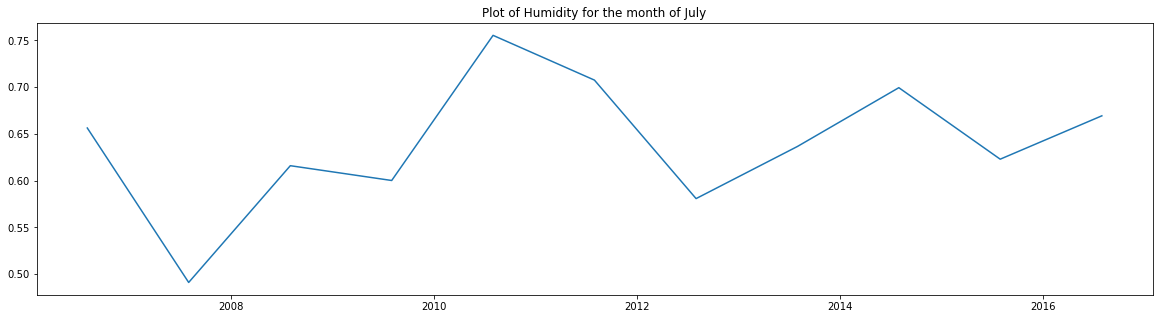

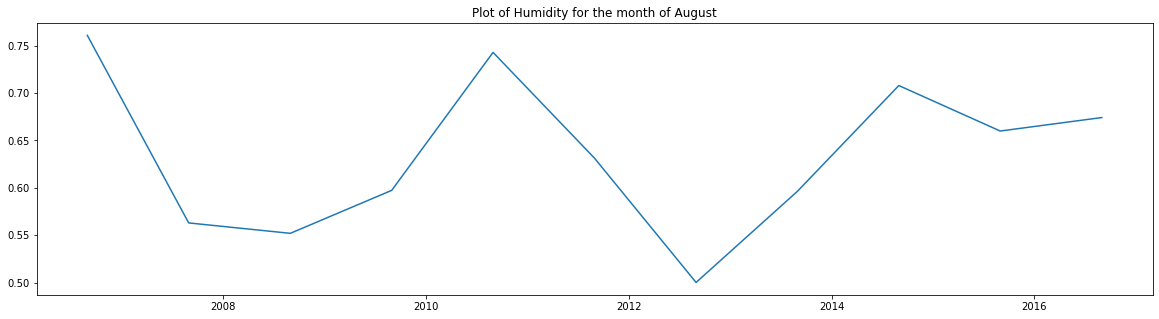

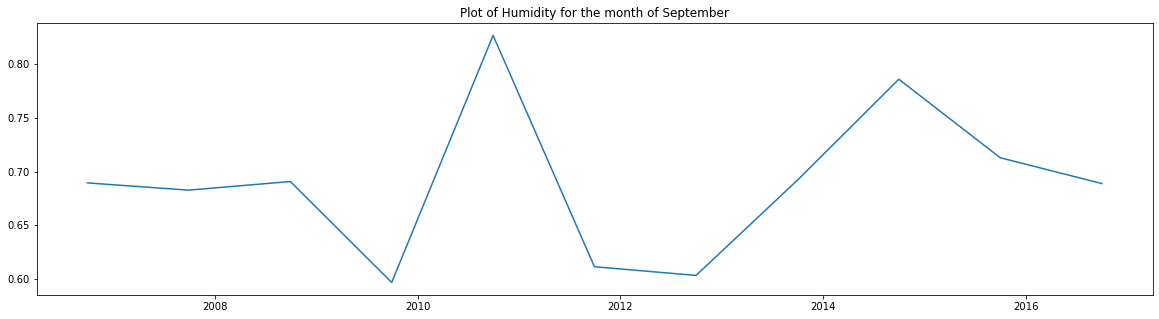

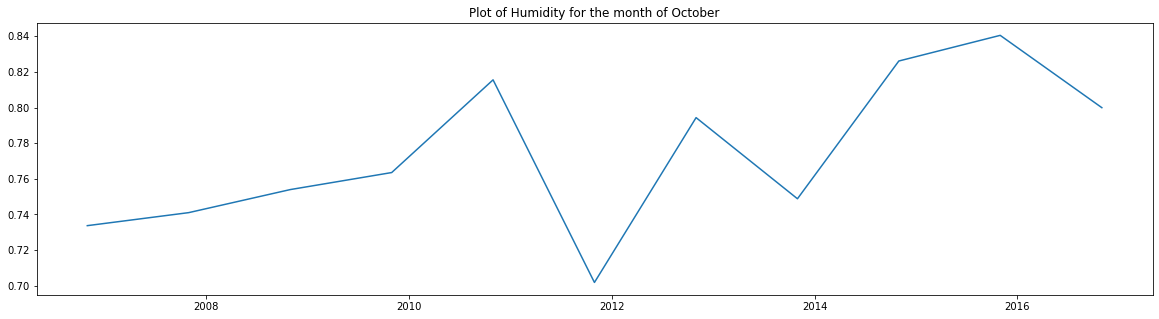

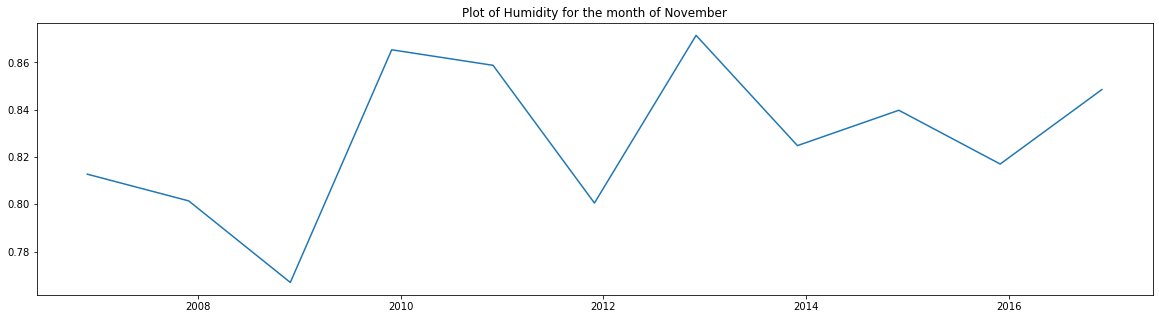

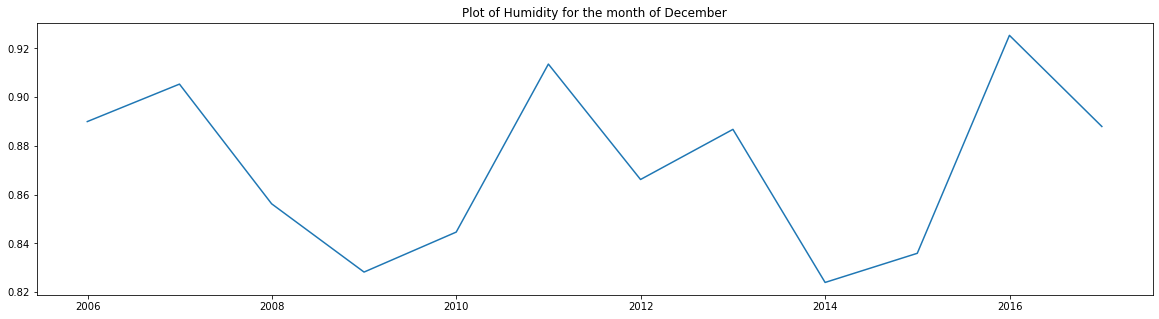

In [60]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', "August", "September", 'October', 'November', 'December']

for m in range(1,13):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 1, 1)
    df1 = df[df.index.month==m]
    t = 'Plot of Humidity for the month of '+ months[m-1]
    plt.title(t)
    plt.plot(df1['humidity'])
    plt.show()